# Multiple Linear Regression
## Author: Eren ERIS

In [22]:
#Reklam Analizi ve tahminleme

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [2]:
# Bu örnekte, reklam bütçeleri (TV, radyo, gazete) ve satış rakamları içeren bir veri seti kullanılacak.
df = pd.read_csv('advertising.csv')

In [3]:
df.head() # Data izleme

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Veri setine genel bakış
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [5]:
# İstatistiksel özet
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


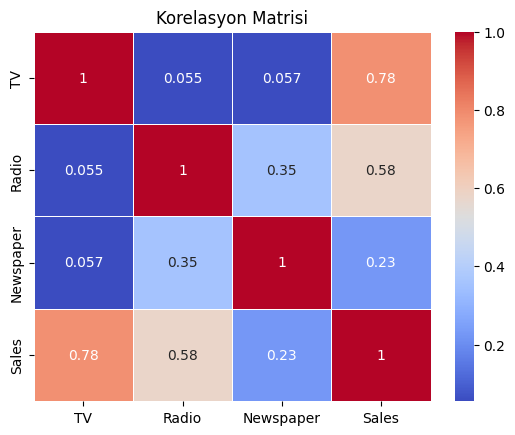

In [9]:
# Korelasyon matrisi
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasyon Matrisi')
plt.show()

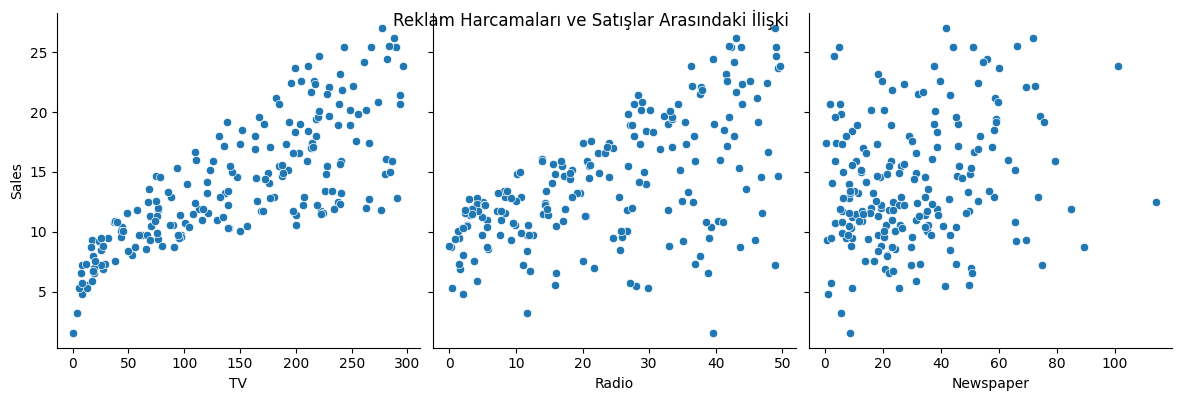

In [10]:
# Scatter plotlar
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle('Reklam Harcamaları ve Satışlar Arasındaki İlişki')
plt.show()

In [12]:
#Boş veri varmı kontrol et
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
# Girdi ve çıktıları ayır
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [15]:
# Veriyi eğitim ve test setlerine bölelim
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [16]:
# Lineer regresyon modelini oluştur
model = LinearRegression()

In [17]:
# Modeli eğit
model.fit(x_train, y_train)

LinearRegression()

In [20]:
# Test seti üzerinde tahmin yap
y_pred = model.predict(x_test)

# Modelin performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.1740973539761024


In [21]:
# Modelin katsayıları
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
print(coefficients)

     Feature  Coefficient
0         TV     0.044730
1      Radio     0.189195
2  Newspaper     0.002761
